In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Churn cleaned.csv")

df.shape
df.head()


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_group,service_count,customer_value
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 year,1,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,2-4 years,3,1936.30
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 year,3,107.70
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2-4 years,3,1903.50
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 year,1,141.40


In [3]:
df['churn'].value_counts()


churn
No     5174
Yes    1869
Name: count, dtype: int64

In [4]:
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})


In [5]:
churn_rate = df['churn'].mean() * 100
churn_rate


26.536987079369588

In [6]:
df[['churn']].head()
df['churn'].dtype


dtype('int64')

In [7]:
retention_rate = 100 - churn_rate
retention_rate


73.4630129206304

In [8]:
arpu = df['monthlycharges'].mean()
arpu


64.76169246059918

In [9]:
revenue_loss = df[df['churn'] == 1]['monthlycharges'].sum()
revenue_loss


139130.85

In [10]:
contract_churn = (
    df.groupby('contract')['churn']
    .mean()
    .sort_values(ascending=False) * 100
)

contract_churn


contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: churn, dtype: float64

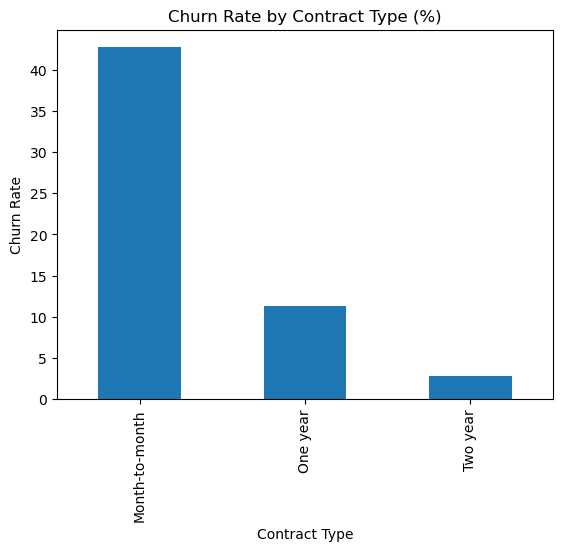

In [11]:
contract_churn.plot(kind='bar')
plt.title("Churn Rate by Contract Type (%)")
plt.ylabel("Churn Rate")
plt.xlabel("Contract Type")
plt.show()


In [12]:
tenure_churn = (
    df.groupby('tenure_group')['churn']
    .mean() * 100
)

tenure_churn


tenure_group
0-1 year     47.678161
1-2 years    28.710938
2-4 years    20.388959
4+ years      9.513176
Name: churn, dtype: float64

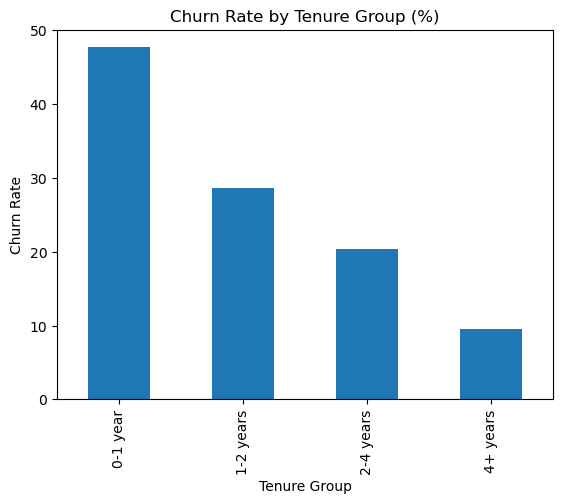

In [13]:
tenure_churn.plot(kind='bar')
plt.title("Churn Rate by Tenure Group (%)")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Group")
plt.show()


In [14]:
payment_churn = (
    df.groupby('paymentmethod')['churn']
    .mean()
    .sort_values(ascending=False) * 100
)

payment_churn


paymentmethod
Electronic check             45.285412
Mailed check                 19.106700
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Name: churn, dtype: float64

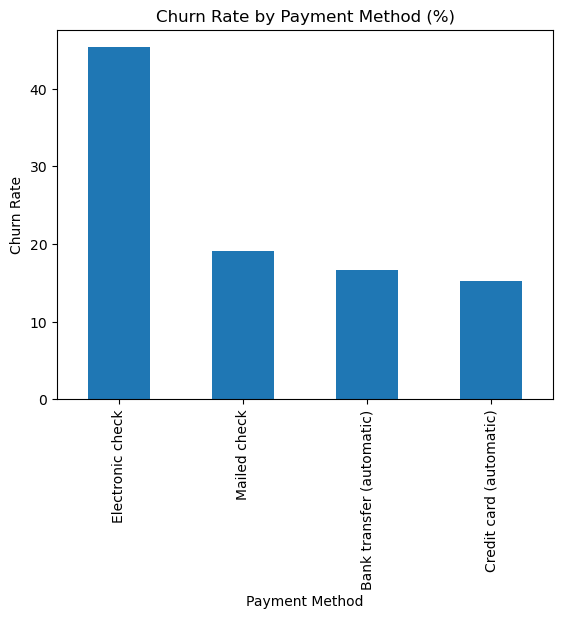

In [15]:
payment_churn.plot(kind='bar')
plt.title("Churn Rate by Payment Method (%)")
plt.ylabel("Churn Rate")
plt.xlabel("Payment Method")
plt.show()


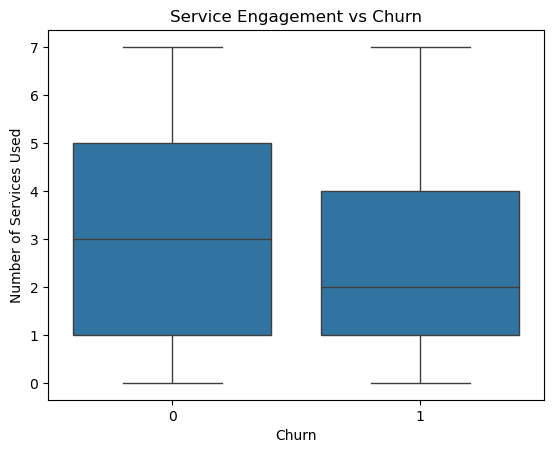

In [16]:
sns.boxplot(x='churn', y='service_count', data=df)
plt.title("Service Engagement vs Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Services Used")
plt.show()


In [17]:
high_value_threshold = df['customer_value'].quantile(0.75)

high_value_churn = df[
    (df['customer_value'] >= high_value_threshold) &
    (df['churn'] == 1)
]

high_value_churn.shape


(255, 24)

## Key Churn Drivers Identified

- Contract type (month-to-month)
- Low tenure (first year customers)
- High monthly charges
- Electronic check payment method
- Low service engagement
- High-value customers causing major revenue loss